<a href="https://colab.research.google.com/github/Stephanie-Daniella/Stock-Returns-Neural-Nerwork/blob/main/Neural_Network_Returns_Individual_Daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 7)
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler

import random
import math

# Data Cleaning

In [ ]:
Start_Date_Str='2020-01-01'
Final_Date_Str='2025-02-19'

In [ ]:
data=yf.download('AAPL',start=Start_Date_Str,end=Final_Date_Str,interval='1d', auto_adjust=False)
AAPL_Rend=data['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed


In [ ]:
scaler = StandardScaler()
scaler.fit(AAPL_Rend)
AAPL_Rend_Stdr=scaler.transform(AAPL_Rend)
AAPL_Rend_Stdr=pd.DataFrame(AAPL_Rend_Stdr, columns=AAPL_Rend.columns, index=AAPL_Rend.index)

In [ ]:
AAPL_Rend_Stdr

Ticker,AAPL
Date,
2020-01-02,NaN
2020-01-03,-0.545340
2020-01-06,0.342811
2020-01-07,-0.293358
2020-01-08,0.750384
...,...
2025-02-11,1.038850
2025-02-12,0.860035
2025-02-13,0.930480


In [ ]:
AAPL_Rend= pd.DataFrame(AAPL_Rend)
AAPL_Rend

Ticker,AAPL
Date,
2020-01-02,NaN
2020-01-03,-0.009722
2020-01-06,0.007968
2020-01-07,-0.004703
2020-01-08,0.016086
...,...
2025-02-11,0.021832
2025-02-12,0.018270
2025-02-13,0.019673


In [ ]:
window_size = 16
transformed_AAPL_Rend = []

# Building the observations, 15 predictors returns and the change predicted
for i in range(1,len(AAPL_Rend_Stdr) - window_size+1):
    row = AAPL_Rend_Stdr['AAPL'][i:i + window_size].values
    transformed_AAPL_Rend.append(row)

# Create a DataFrame
columns = [f'Change_{i}' for i in range(1, window_size)] + ['ChangeToPredict']
transformed_AAPL_Rend = pd.DataFrame(transformed_AAPL_Rend, columns=columns)

# Results
transformed_AAPL_Rend

,Change_1,Change_2,Change_3,Change_4,Change_5,Change_6,Change_7,Change_8,Change_9,Change_10,Change_11,Change_12,Change_13,Change_14,Change_15,ChangeToPredict
0,-0.545340,0.342811,-0.293358,0.750384,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924,-1.533545
1,0.342811,-0.293358,0.750384,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924,-1.533545,1.363053
2,-0.293358,0.750384,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924,-1.533545,1.363053,0.993703
3,0.750384,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924,-1.533545,1.363053,0.993703,-0.130001
4,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924,-1.533545,1.363053,0.993703,-0.130001,-2.283312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,-1.659603,0.211112,-0.095365,-0.254776,1.538322,1.777493,0.174557,-0.428498,-0.393222,-1.757009,0.997486,-0.128404,0.104740,-1.260614,0.002378,1.038850
1269,0.211112,-0.095365,-0.254776,1.538322,1.777493,0.174557,-0.428498,-0.393222,-1.757009,0.997486,-0.128404,0.104740,-1.260614,0.002378,1.038850,0.860035
1270,-0.095365,-0.254776,1.538322,1.777493,0.174557,-0.428498,-0.393222,-1.757009,0.997486,-0.128404,0.104740,-1.260614,0.002378,1.038850,0.860035,0.930480
1271,-0.254776,1.538322,1.777493,0.174557,-0.428498,-0.393222,-1.757009,0.997486,-0.128404,0.104740,-1.260614,0.002378,1.038850,0.860035,0.930480,0.580916


In [ ]:
ChangeToPredict=transformed_AAPL_Rend['ChangeToPredict']
ChangeToPredict

,ChangeToPredict
0,-1.533545
1,1.363053
2,0.993703
3,-0.130001
4,-2.283312
...,...
1268,1.038850
1269,0.860035
1270,0.930480
1271,0.580916


In [ ]:
del transformed_AAPL_Rend['ChangeToPredict']
transformed_AAPL_Rend

,Change_1,Change_2,Change_3,Change_4,Change_5,Change_6,Change_7,Change_8,Change_9,Change_10,Change_11,Change_12,Change_13,Change_14,Change_15
0,-0.545340,0.342811,-0.293358,0.750384,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924
1,0.342811,-0.293358,0.750384,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924,-1.533545
2,-0.293358,0.750384,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924,-1.533545,1.363053
3,0.750384,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924,-1.533545,1.363053,0.993703
4,1.009200,0.056257,1.015381,-0.735179,-0.272399,0.571679,0.498578,-0.397465,0.121963,0.184546,-0.201924,-1.533545,1.363053,0.993703,-0.130001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,-1.659603,0.211112,-0.095365,-0.254776,1.538322,1.777493,0.174557,-0.428498,-0.393222,-1.757009,0.997486,-0.128404,0.104740,-1.260614,0.002378
1269,0.211112,-0.095365,-0.254776,1.538322,1.777493,0.174557,-0.428498,-0.393222,-1.757009,0.997486,-0.128404,0.104740,-1.260614,0.002378,1.038850
1270,-0.095365,-0.254776,1.538322,1.777493,0.174557,-0.428498,-0.393222,-1.757009,0.997486,-0.128404,0.104740,-1.260614,0.002378,1.038850,0.860035
1271,-0.254776,1.538322,1.777493,0.174557,-0.428498,-0.393222,-1.757009,0.997486,-0.128404,0.104740,-1.260614,0.002378,1.038850,0.860035,0.930480


# Neural Network

In [ ]:
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Dropout, LeakyReLU
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, LayerNormalization
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

In [ ]:
Top=int(ChangeToPredict.size*.8)+1

In [ ]:
Y_Train=ChangeToPredict[0:Top]
Y_Test=ChangeToPredict[Top:]
X_Train=transformed_AAPL_Rend[0:Top]
X_Test=transformed_AAPL_Rend[Top:]

In [ ]:
modeloUni_3 = Sequential()
modeloUni_3.add(Dense(64, input_dim=15))
modeloUni_3.add(BatchNormalization())
modeloUni_3.add(LeakyReLU(alpha=0.1))

#modeloUni_3.add(Dense(120))
#modeloUni_3.add(LeakyReLU(alpha=0.1))
#modeloUni_3.add(Dropout(0.25))

modeloUni_3.add(Dense(32))
modeloUni_3.add(LeakyReLU(alpha=0.1))
modeloUni_3.add(Dropout(0.25))

modeloUni_3.add(Dense(16))
modeloUni_3.add(BatchNormalization())
modeloUni_3.add(LeakyReLU(alpha=0.1))

modeloUni_3.add(Dense(1, activation='linear'))
modeloUni_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)                    │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_82 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_83 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_84 (LeakyReLU)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,809 (14.88 KB)

 Non-trainable params: 160 (640.00 B)

In [ ]:
random.seed(996)
Batch_size = 16
optimizer = Adam(learning_rate=0.001)

modeloUni_3.compile(loss='mean_squared_error', optimizer=optimizer, metrics=["mean_squared_error"])
early_stop = EarlyStopping(monitor='mean_squared_error', min_delta=0.000001, patience=20, restore_best_weights=True)
modeloUni_3.fit(X_Train, Y_Train, epochs=1000, batch_size=Batch_size, verbose=1,callbacks=[early_stop]);

Epoch 1/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5223 - mean_squared_error: 1.5223
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3191 - mean_squared_error: 1.3191
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1070 - mean_squared_error: 1.1070
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2996 - mean_squared_error: 1.2996
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1622 - mean_squared_error: 1.1622
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9588 - mean_squared_error: 0.9588
Epoch 7/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1746 - mean_squared_error: 1.1746
Epoch 8/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1623 - mean_squared_error: 1.1623
Epoch 9/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0857 - mean_squared_error: 1.0857
Epoch 10/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0041 - mean_squared_error: 1.0041
Epoch 11/1000
64/64 ━━━━━━━━━━━━━━━━━━━

In [ ]:
modeloUni_3.evaluate(X_Test, Y_Test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6738 - mean_squared_error: 0.6738 


[0.646833598613739, 0.646833598613739]

In [ ]:
Y_Predict_Test_3=modeloUni_3.predict(X_Test)

Y_Predict_Test_3=pd.DataFrame(Y_Predict_Test_3)
Y_Predict_Test_3.columns=['ChangeToPredict']

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


# Graph Train Data

In [ ]:
modeloUni_3.evaluate(X_Train, Y_Train)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4208 - mean_squared_error: 0.4208 


[0.34706443548202515, 0.34706443548202515]

In [ ]:
Y_Predict_Train_3=modeloUni_3.predict(X_Train)
Y_Predict_Train_3=pd.DataFrame(Y_Predict_Train_3)
Y_Predict_Train_3.columns=['ChangeToPredict']

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


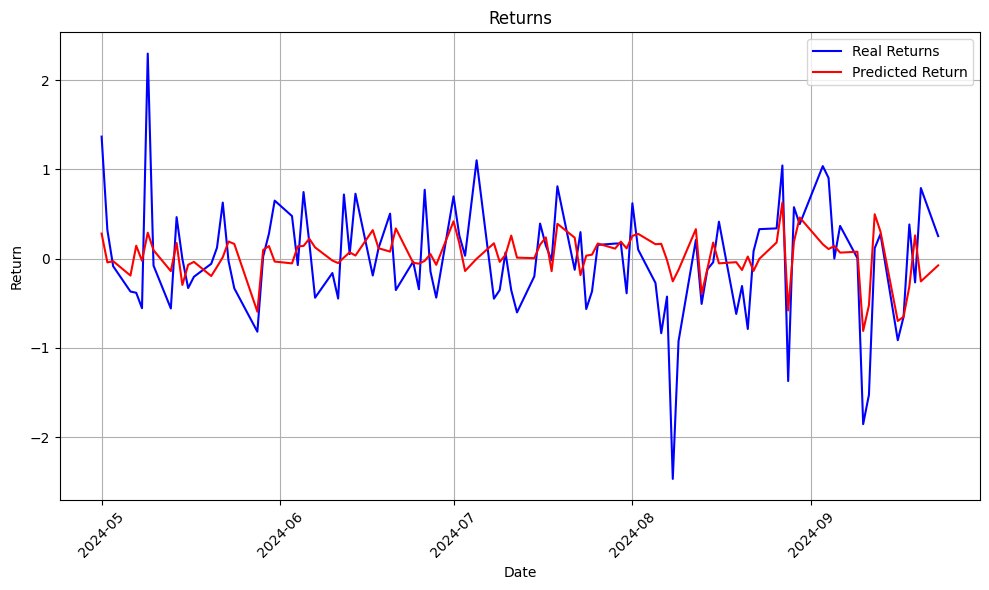

In [ ]:
start=-200
end=-100


Y_Test_100D=Y_Train.iloc[start:end]
Y_Test_100D.reset_index(drop=True, inplace=True)
Y_Predict_Test_100D=Y_Predict_Train_3.iloc[start:end]


Y_Test_DF = pd.DataFrame(Y_Test_100D)
Y_Predict_Train_DF = pd.DataFrame(Y_Predict_Train_3.iloc[start:end])

Y_Test_DF['Date'] = pd.to_datetime(data.index[start:end])
Y_Predict_Train_DF['Date'] = pd.to_datetime(data.index[start:end])


plt.figure(figsize=(10, 6))

plt.plot(Y_Test_DF['Date'], Y_Test_DF['ChangeToPredict'], label='Real Returns', color='blue')
plt.plot(Y_Predict_Train_DF['Date'], Y_Predict_Train_DF['ChangeToPredict'], label='Predicted Return', color='red')

plt.xlabel('Date')
plt.ylabel('Standarized Returns')
plt.title('Returns Training Data')

plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graph predictions

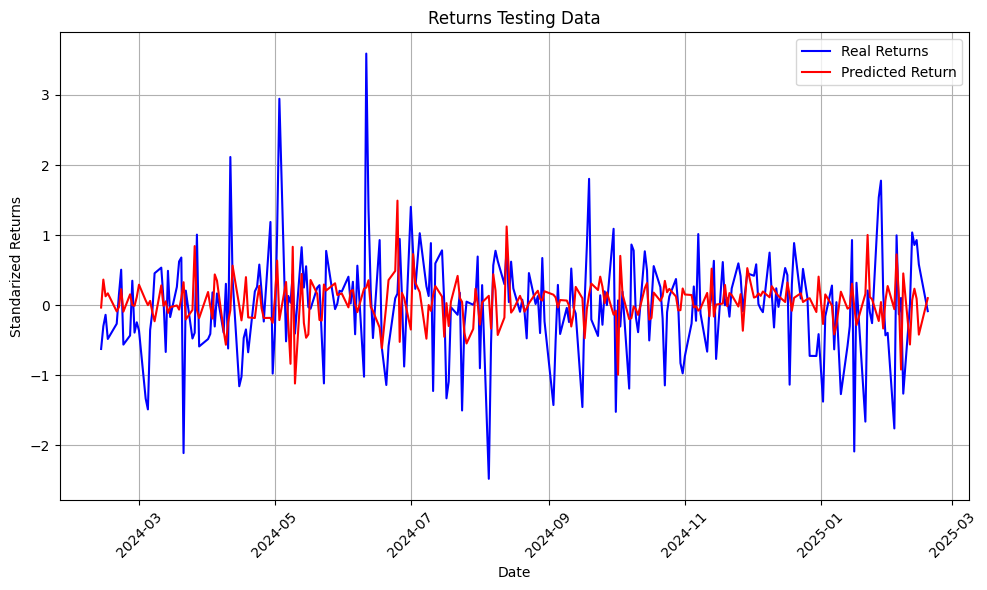

In [ ]:
Y_Test_DF = pd.DataFrame(Y_Test)
Y_Predict_Test_DF = pd.DataFrame(Y_Predict_Test_3)

fecha_inicial = datetime.strptime(Start_Date_Str, "%Y-%m-%d")
DaysAdded = Top+16

Start_Date_Graph=fecha_inicial + relativedelta(months=DaysAdded)
Start_Date_Graph=Start_Date_Graph.strftime("%Y-%m-%d")

Y_Test_DF['Date'] = pd.to_datetime(data.index[DaysAdded:])
Y_Predict_Test_DF['Date'] = pd.to_datetime(data.index[DaysAdded:])

plt.figure(figsize=(10, 6))

plt.plot(Y_Test_DF['Date'], Y_Test_DF['ChangeToPredict'], label='Real Returns', color='blue')
plt.plot(Y_Predict_Test_DF['Date'], Y_Predict_Test_DF['ChangeToPredict'], label='Predicted Return', color='red')

plt.xlabel('Date')
plt.ylabel('Standarized Returns')
plt.title('Returns Testing Data')

plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Last 100 Days Graph

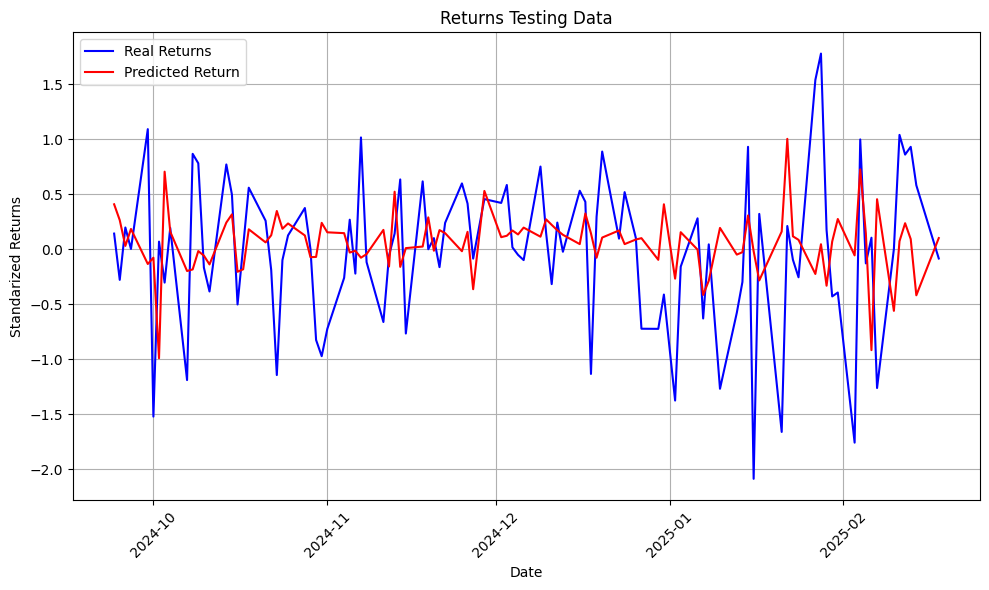

In [ ]:
window=100

Y_Test_100D=Y_Test.tail(window)
Y_Predict_Test_100D=Y_Predict_Test_3.tail(window)
Y_Test_100D.reset_index(drop=True, inplace=True)

Y_Test_DF = pd.DataFrame(Y_Test_100D)
Y_Predict_Test_DF = pd.DataFrame(Y_Predict_Test_3.tail(window))

Y_Test_DF['Date'] = pd.to_datetime(data.index[-window:])
Y_Predict_Test_DF['Date'] = pd.to_datetime(data.index[-window:])


plt.figure(figsize=(10, 6))

plt.plot(Y_Test_DF['Date'], Y_Test_DF['ChangeToPredict'], label='Real Returns', color='blue')
plt.plot(Y_Predict_Test_DF['Date'], Y_Predict_Test_DF['ChangeToPredict'], label='Predicted Return', color='red')

plt.xlabel('Date')
plt.ylabel('Standarized Returns')
plt.title('Returns Testing Data')

plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graph Zoom

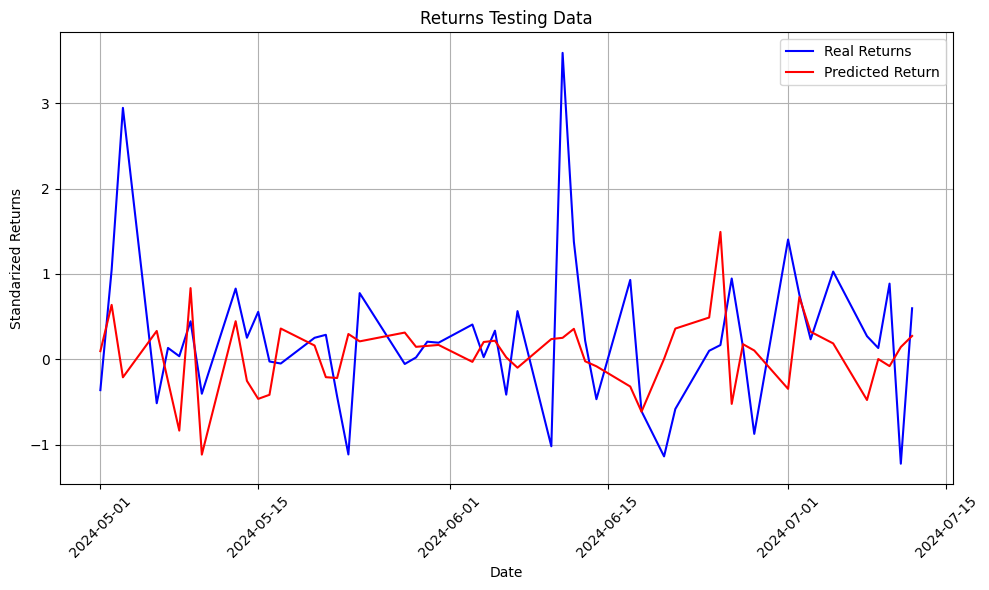

In [ ]:
start=-200
end=-150


Y_Test_100D=Y_Test.iloc[start:end]
Y_Test_100D.reset_index(drop=True, inplace=True)
Y_Predict_Test_100D=Y_Predict_Test_3.iloc[start:end]


Y_Test_DF = pd.DataFrame(Y_Test_100D)
Y_Predict_Test_DF = pd.DataFrame(Y_Predict_Test_3.iloc[start:end])

Y_Test_DF['Date'] = pd.to_datetime(data.index[start:end])
Y_Predict_Test_DF['Date'] = pd.to_datetime(data.index[start:end])


plt.figure(figsize=(10, 6))

plt.plot(Y_Test_DF['Date'], Y_Test_DF['ChangeToPredict'], label='Real Returns', color='blue')
plt.plot(Y_Predict_Test_DF['Date'], Y_Predict_Test_DF['ChangeToPredict'], label='Predicted Return', color='red')

plt.xlabel('Date')
plt.ylabel('Standarized Returns')
plt.title('Returns Testing Data')

plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()